Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolás Guarín-Zapata 2020. Este material es parte del curso Modelación Computacional en el programa de Ingeniería Civil de la Universidad EAFIT.

# Transformación de coordenadas en cerchas

In [1]:
from sympy import *

In [2]:
init_session()

IPython console for SymPy 1.4 (Python 3.7.3-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



## Transformación de coordenadas de vectores

## Transformación de las ecuaciones de un elemento cercha

Tomemos un elemento tipo cercha que se encuentra horizontal.

<center>
    <img src="img/cercha_local_horizontal.svg"
         alt="Cercha en el sistema de referencia global."
         style="width:450px">
</center>


Para este, podemos escribir
el balance de fuerzas en componentes como

\begin{align}
\sum F_x = 0\, ,\\
\sum F_y = 0\, .
\end{align}

Y esto podemos escribirlo de forma matricial de la siguiente manera

$$\begin{bmatrix}
+k &0 &-k &0\\
 0 &0 &0  &0\\
-k &0 &+k &0\\
 0 &0 &0  &0\end{bmatrix}
\begin{Bmatrix} u_1\\ v_1\\ u_2\\ v_2\end{Bmatrix} =
\begin{Bmatrix} -f_1\\ 0\\ -f_2\\ 0\end{Bmatrix}\, .$$

Ahora, queremos expresar nuestro sistema de ecuaciones en un sistema rotado
un ángulo $\theta$.

<center>
    <img src="img/cercha_global.svg"
         alt="Cercha en el sistema de referencia global."
         style="width:400px">
</center>

Las componentes estarían dadas por

\begin{align}
u_1' = u_1 \cos\theta + v_1 \sin\theta\, ,\\
v_1' = -u_1 \sin\theta + v_1 \cos\theta\, ,\\
u_2' = u_2 \cos\theta + v_2 \sin\theta\, ,\\
v_2' = -u_2 \sin\theta + v_2 \cos\theta\, ,\\
\end{align}

o, matricialmente,

$$\begin{Bmatrix}u_1'\\ v_1'\\ u_2'\\ v_2'\end{Bmatrix} =
\underbrace{
\begin{bmatrix}
\cos\theta &\sin\theta &0 &0\\
-\sin\theta &\cos\theta &0 &0\\
0 &0 &\cos\theta &\sin\theta\\
0 &0 &-\sin\theta &\cos\theta
\end{bmatrix}}_{T}
\begin{Bmatrix}u_1\\ v_1\\ u_2\\ v_2\end{Bmatrix}\, .$$

Que podemos escribir de manera abreviada como

$$\{U'\} = [T]\{U\}\, .$$

Tenemos que

\begin{align}
&[K] \{U'\} = \{F\}\, ,\\
&[K] [T] \{U\} = [T] \{F\}\, .
\end{align}

Y, multiplicando ambos lados por $[T]^T$, obtenemos
\begin{align}
&[T]^T [K] [T] \{U\} = \underbrace{[T]^T [T]}_{[I]} \{F\}\, ,\\
&[T]^T [K] [T] \{U\} = \{F\}\, .
\end{align}

## Ejemplo

Calculemos las matrices de rigidez para los elementos de la siguiente
cercha.

<center>
    <img src="img/cercha_transformacion.svg"
         alt="Cercha ejemplo."
         style="width:400px">
</center>

En donde la sección transversal ($A$) y módulo de Young ($E$) son los
mismos para todas las barras.

Para facilitar los cálculos, haremos uso de SymPy.

In [3]:
A, E, L, theta = symbols("A E L theta")
L0, L1, L2 = symbols("L0 L1 L2")
T = Matrix([
    [cos(theta), -sin(theta), 0 ,0],
    [sin(theta), cos(theta), 0 ,0],
    [0, 0, cos(theta), -sin(theta)],
    [0, 0, sin(theta), cos(theta)]])
rigidez_local = A*E/L * Matrix([
    [1, 0, -1, 0],
    [0, 0,  0, 0],
    [-1, 0, 1, 0],
    [0, 0, 0, 0]])

Veamos las matrices que definimos.

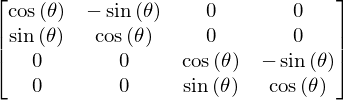

In [4]:
T

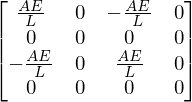

In [5]:
rigidez_local

### Elemento 0

Para este elemento, tenemos que el ángulo es 0, luego

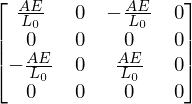

In [6]:
rigidez_0 = T.T.subs(theta, 0) * rigidez_local.subs(L, L0) * T.subs(theta, 0)
rigidez_0

### Elemento 1

Para este elemento $\theta = 5\pi/6$, luego

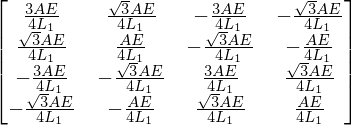

In [7]:
rigidez_1 = T.T.subs(theta, 5*pi/6) * rigidez_local.subs(L, L1) * T.subs(theta, 5*pi/6)
rigidez_1

### Elemento 2

Para este elemento $\theta = \pi/2$, luego

In [ ]:
rigidez_2 = T.T.subs(theta, pi/2) * rigidez_local.subs(L, L2) * T.subs(theta, pi/2)
rigidez_2

## Referencias

1. Abani Patra. (Marzo 15, 1999). Trusses and Transformations. Fecha de acceso: Octubre 28, 2019, disponible en: http://www.eng.buffalo.edu/~abani/fem/node6.html.